# Task a

In [1]:
from parameters import *
from functions import *
walks = 1500
N = 200

# X0 = [-1.5, 1.]
# PDEProb = 0.7132074678294174

# X0 = [-1.5, 1.5]
# PDEProb = 0.3397504218684861

X0 = [-1.5, 2.]
PDEProb = 0.09802192210119967

1.0000000000000007


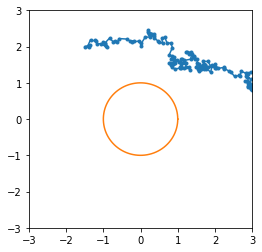

In [2]:
np.random.seed(SEED) #scipy is based on the numpy seed
X, finalTime = NaiveRandomWalk(X0, N, T)

#plots the walk
plt.figure(figsize=[4,4])
X = X.T
plt.plot(X[0,:],X[1,:], '.-')
plt.xlim([-3,3])
plt.ylim([-3,3])

#plots the well
theta = np.linspace(0,2*np.pi,100)
plt.plot(R*np.cos(theta),R*np.sin(theta))
print(finalTime)

# MC simulation

In [3]:
polluted = np.zeros(walks)
np.random.seed(SEED) #scipy is based on the numpy seed
for w in range(walks):
    if (w%100 == 0):
        print('Current walk: ', w )
    #diff equation
    _, finalT = NaiveRandomWalk(X0, N, T)
    if finalT < 1:
            polluted[w] = 1
            


Current walk:  0
Current walk:  100
Current walk:  200
Current walk:  300
Current walk:  400
Current walk:  500
Current walk:  600
Current walk:  700
Current walk:  800
Current walk:  900
Current walk:  1000
Current walk:  1100
Current walk:  1200
Current walk:  1300
Current walk:  1400


In [4]:
confidence = 0.95
mean = polluted.mean()
std = np.std(polluted, ddof = 1)
LB, UB = CI(mean, std, walks, confidence)

print(f'Number of simulations: {walks}')
print(f'The estimated probability at {X0} is: {mean} (using MC), {PDEProb} (using the PDE)')
print(f'Confidence interval: [ {mean} +- {UB-mean} ]\twith P = {confidence}%')

Number of simulations: 1500
The estimated probability at [-1.5, 2.0] is: 0.09866666666666667 (using MC), 0.09802192210119967 (using the PDE)
Confidence interval: [ 0.09866666666666667 +- 0.015108662712786144 ]	with P = 0.95%
